In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
traindata = pd.read_csv('train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
print('Problem 1')

saleprice = pd.DataFrame(traindata['SalePrice'])
grlivarea = pd.DataFrame(traindata['GrLivArea'])
traindata.count()



Problem 1


Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

GrLivArea vs. SalePrice
Mean Squared Error (MSE) 	: 4381285914.948262
Root Mean Squared Error (RMSE) 	: 66191.28277158755

Intercept of Regression 	: b =  [24608.99260642]
Coefficients of Regression 	: a =  [[102.99336687]]



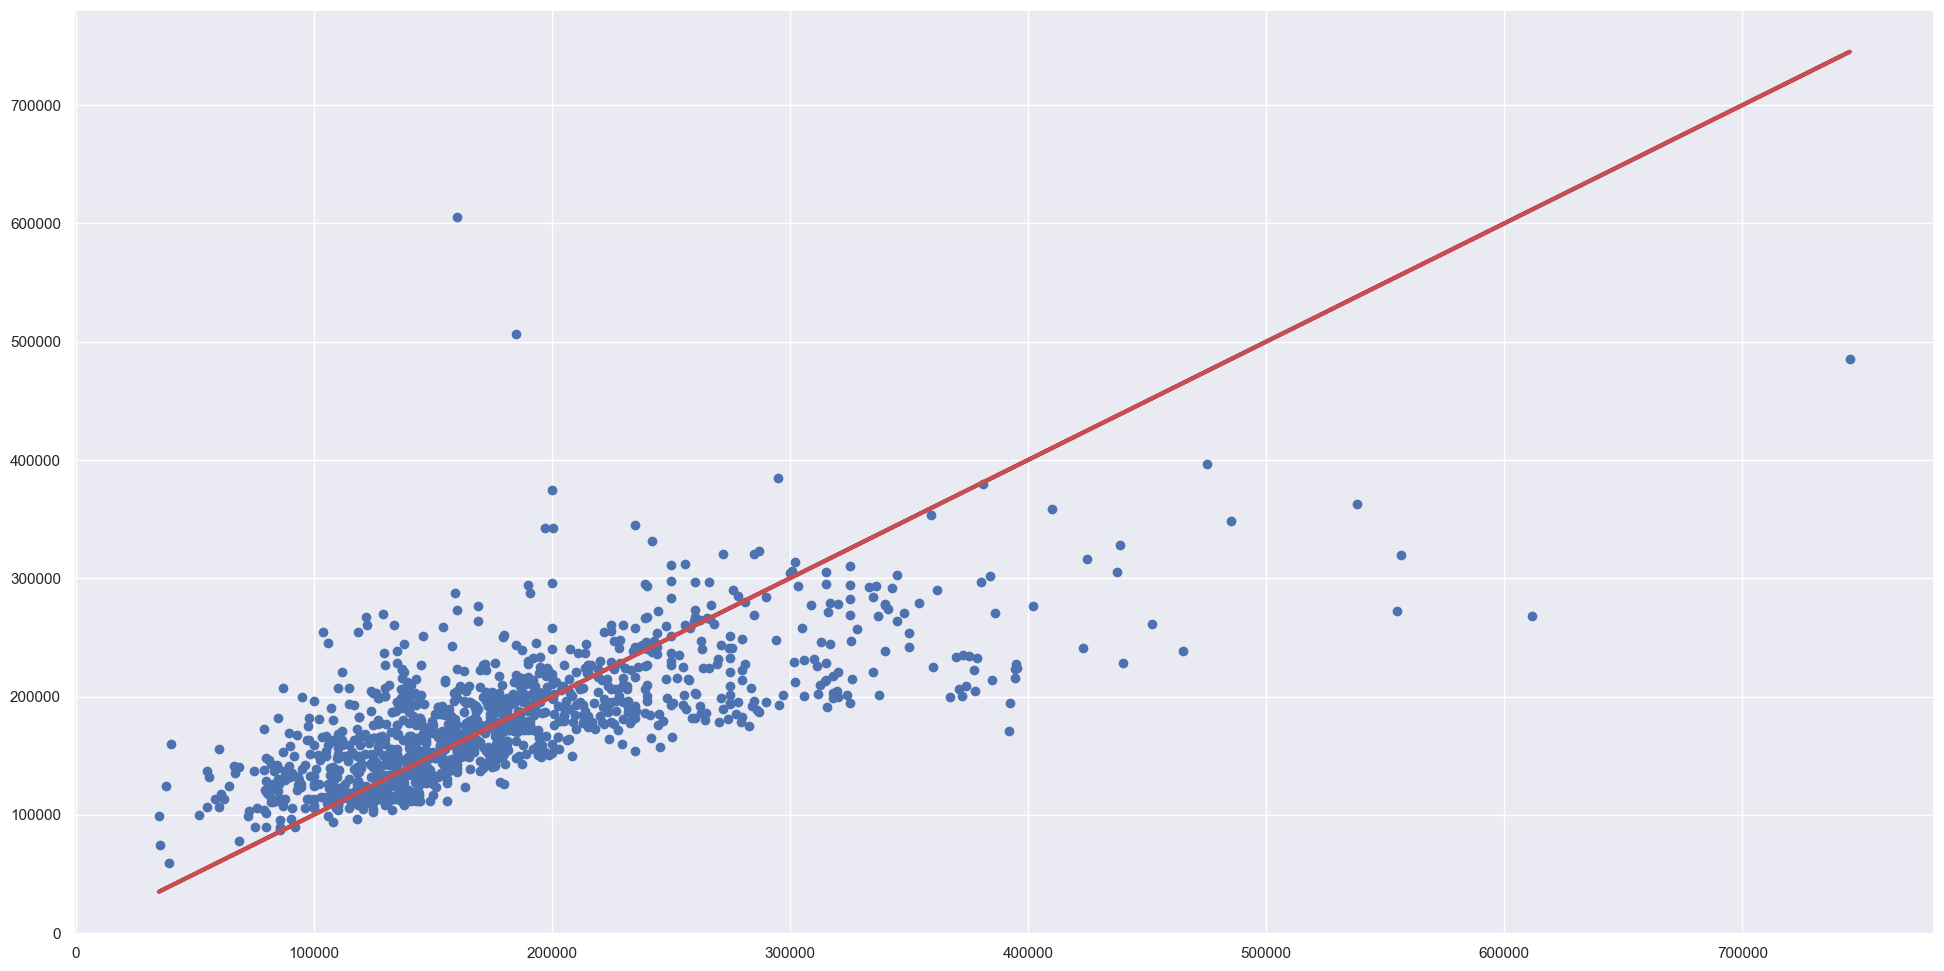

In [32]:
#Problem 1
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



def gof_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
          
print("GrLivArea vs. SalePrice")
gof_func(grlivarea,saleprice)
print("")



def regression_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.20)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Plot the regression line
    f = plt.figure(figsize=(24, 12))
    plt.scatter(y_train, y_train_pred, color = "b")
    plt.plot(y_train, y_train, 'r-', linewidth = 3)

regression_func(grlivarea,saleprice)


GarageArea vs. SalePrice
Mean Squared Error (MSE) 	: 4162354335.0183663
Root Mean Squared Error (RMSE) 	: 64516.31061226584

Intercept of Regression 	: b =  [66916.68228871]
Coefficients of Regression 	: a =  [[239.50305772]]



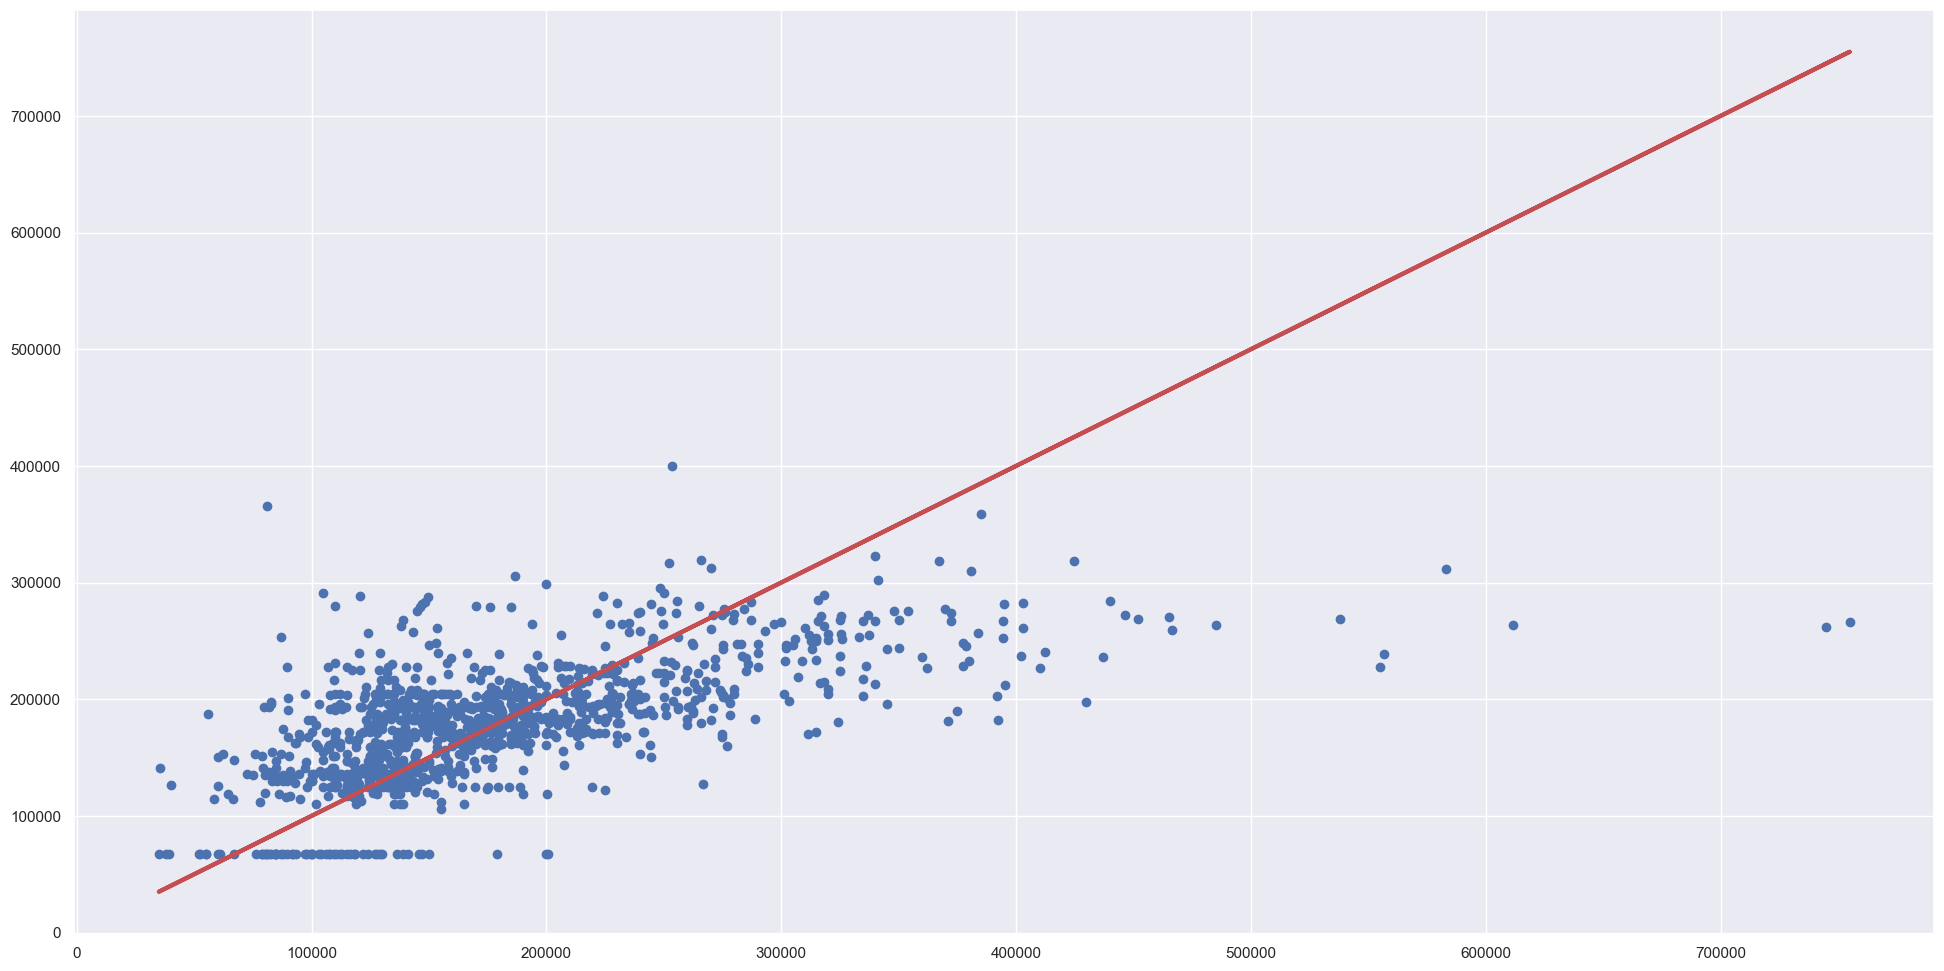

In [33]:
# Problem 2 part 1
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

saleprice = pd.DataFrame(traindata['SalePrice'])
garagearea = pd.DataFrame(traindata['GarageArea'])

print("GarageArea vs. SalePrice")
gof_func(garagearea,saleprice)
print("")

regression_func(garagearea,saleprice)

TotalBsmtSF vs. SalePrice
Mean Squared Error (MSE) 	: 3715239142.0848675
Root Mean Squared Error (RMSE) 	: 60952.761562417065

Intercept of Regression 	: b =  [67264.30755356]
Coefficients of Regression 	: a =  [[108.3235807]]



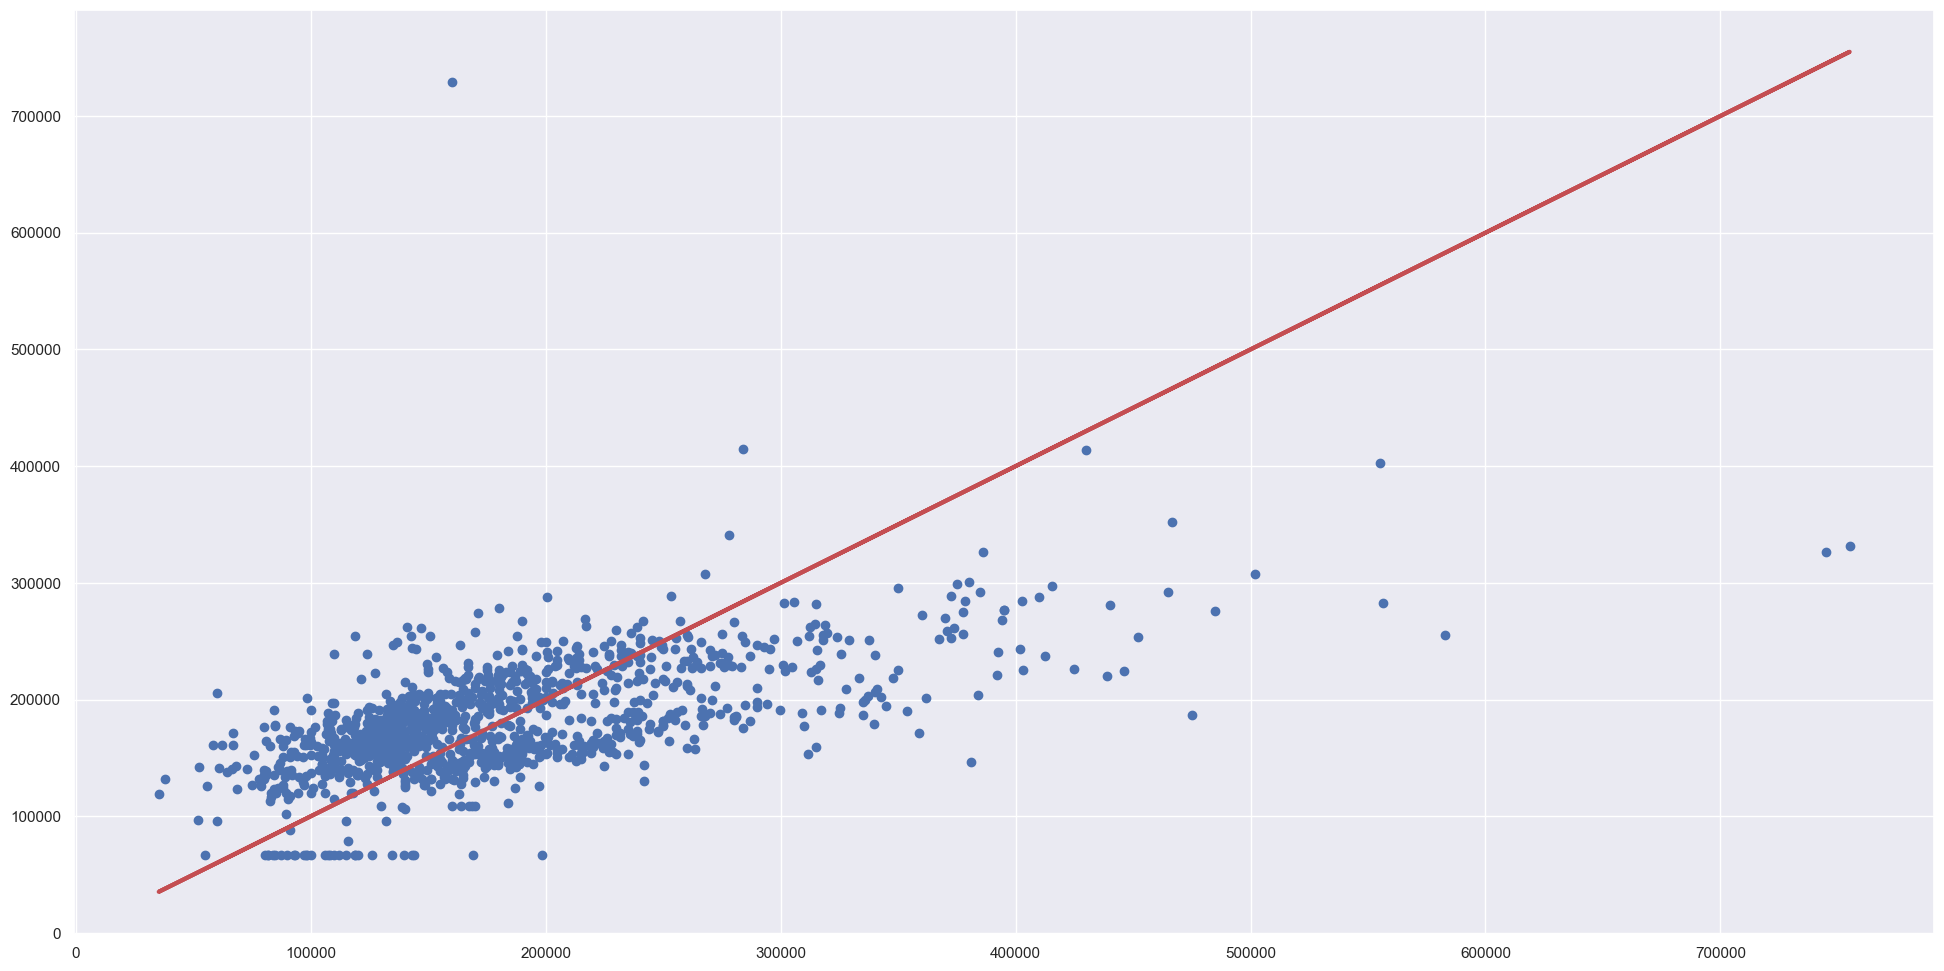

In [34]:
# Problem 2 part 2
sb.set()
traindata = pd.read_csv('train.csv')
traindata.head()
saleprice = pd.DataFrame(traindata['SalePrice'])
bsmtsf = pd.DataFrame(traindata['TotalBsmtSF'])


# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print("TotalBsmtSF vs. SalePrice")
gof_func(bsmtsf,saleprice)
print("")
regression_func(bsmtsf,saleprice)




GrLivArea has lowest RMSE , hence it is the best model to predict sale price


RMSE:
Garage Area:  59920.49269447475
TotalBsmtSF: 66583.41751271469
GrLivArea: 58433.529262615724

In [6]:
#Problem 3 (a)
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers_saleprice = find_outliers_IQR(traindata['SalePrice'])
print(outliers_saleprice)

outliers_grarea = find_outliers_IQR(traindata['GrLivArea'])
print(outliers_grarea)

pd.concat([outliers_saleprice, outliers_grarea])

11      345000
53      385000
58      438780
112     383970
151     372402
         ...  
1268    381000
1353    410000
1373    466500
1388    377500
1437    394617
Name: SalePrice, Length: 61, dtype: int64
58      2945
118     3222
185     3608
197     3112
231     2794
304     3493
324     2978
496     3228
523     4676
583     2775
608     3194
635     3395
691     4316
769     3279
798     3140
803     2822
961     2872
1024    2898
1031    3082
1046    2868
1142    2828
1169    3627
1173    3086
1175    2872
1182    4476
1268    3447
1298    5642
1312    2810
1328    2792
1353    3238
1386    2784
Name: GrLivArea, dtype: int64


11      345000
53      385000
58      438780
112     383970
151     372402
         ...  
1298      5642
1312      2810
1328      2792
1353      3238
1386      2784
Length: 92, dtype: int64

In [7]:
#Problem 3(b)


def FindOutlierBound(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print("Lower:", q1 - 1.5 * iqr)
    print("Upper:", q3 + 1.5 * iqr)


FindOutlierBound(traindata, "SalePrice")
FindOutlierBound(traindata, "GrLivArea")
#! Bit wise comparisons
df_filtered = traindata[(traindata["SalePrice"] <= 340037.5) & (traindata["SalePrice"] >= 3937.5) & (traindata["GrLivArea"] <= 2747.625)& (traindata["GrLivArea"] >= 158.625)]

SalePrice_Cleaned = pd.DataFrame(df_filtered['SalePrice'])
GrLivArea_Cleaned = pd.DataFrame(df_filtered['GrLivArea'])


Lower: 3937.5
Upper: 340037.5
Lower: 158.625
Upper: 2747.625


In [30]:
print("GrLivArea_Cleaned vs. SalePrice_Cleaned")
gof_func(GrLivArea_Cleaned, SalePrice_Cleaned)
print("")


GrLivArea_Cleaned vs. SalePrice_Cleaned
Mean Squared Error (MSE) 	: 1707421543.5985098
Root Mean Squared Error (RMSE) 	: 41320.95768007453



Comparing to the model obtained in qn 1, R^2 on train set close to original, but RMSE is much lower. Hence the new model is better in terms of prediction than the old model.

new model RMSE: 41320.95768007453
old model RMSE: 58433.529262615724